In [1]:
%matplotlib inline
import networkx as nx
import csv
import re
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from networkx.algorithms.connectivity import minimum_st_edge_cut
from networkx.algorithms.flow import shortest_augmenting_path
from sklearn.cluster import KMeans


In [2]:
def L1 (x,y):
    dist = 0
    if len(x)==len(y):
        for i in range(len(x)):
            dist += math.fabs(x[i]-y[i])
        return(dist)
    else:
        print('vectors must be equal length for L1')
        return (Null)


In [3]:
i = 0

with open('training.1600000.processed.noemoticon.csv') as f_in:
    for line in f_in:
        print (list(csv.reader(line, skipinitialspace=True)))
        print (line)
        i+=1
        if i>3:
            break

[['0'], ['', ''], ['1467810369'], ['', ''], ['Mon Apr 06 22:19:45 PDT 2009'], ['', ''], ['NO_QUERY'], ['', ''], ['_TheSpecialOne_'], ['', ''], ["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"], []]
"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

[['0'], ['', ''], ['1467810672'], ['', ''], ['Mon Apr 06 22:19:49 PDT 2009'], ['', ''], ['NO_QUERY'], ['', ''], ['scotthamilton'], ['', ''], ["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"], []]
"0","1467810672","Mon Apr 06 22:19:49 PDT 2009","NO_QUERY","scotthamilton","is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!"

[['0'], ['', ''], ['1467810917'], ['', ''], ['Mon Apr 06 22:19:53 PDT 2009'], ['', '

In [11]:

G=nx.Graph()
m=0
n=0

# with open('training.1600000.processed.noemoticon.csv', encoding='latin-1') as f_in:
with open('training.1600000.processed.noemoticon.csv') as f_in:
    for line in f_in:
        lineX = list(csv.reader(line, skipinitialspace=True))
        G.add_node(lineX[8][0])
        if '@' in lineX[10][0]:
            m+=1
            for t in re.split('[^a-zA-Z\_\@]', lineX[10][0]):
                if t!='' and t[0]=='@' and t!='@':
                    G.add_edge(lineX[8][0],t[1:])
                    n+=1
        if n%100000==0:
            print(n)
print(nx.number_of_nodes(G))

100000
100000
100000
100000
100000
100000
100000
200000
200000
300000
300000
400000
500000
600000
700000
889334


In [14]:
print(nx.number_of_edges(G))

616462


In [9]:
"""0 - the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)
1 - the id of the tweet (2087)
2 - the date of the tweet (Sat May 16 23:58:44 UTC 2009)
3 - the query. If there is no query, then this value is NO_QUERY.
4 - the user that tweeted
5 - the text of the tweet"""
cols = ['polarity','tweetID','date','Query','UserID','text']
f_in = pd.read_csv('training.1600000.processed.noemoticon.csv',names=cols,encoding='latin-1')#names=m_cols ,


In [10]:

GG=nx.Graph() # so that we dont destroy G if we start running this cell

m=0
n=0

for index, row in f_in.iterrows():
    G.add_node(row[4])
    if '@' in row[5]:
        m+=1
        for t in re.split('[^a-zA-Z\_\@]', row[5]):
            if t!='' and t[0]=='@':
                G.add_edge(row[4],t[1:])
                n+=1

KeyboardInterrupt: 

In [15]:
float(nx.number_of_edges(G))/float(nx.number_of_nodes(G))

0.6931726437986179

In [16]:
DegList = list(nx.degree(G).values())
DegDic = {}
for D in DegList:
    if D in DegDic:
        DegDic[D] += 1
    else:
        DegDic[D] = 1

(array([  8.88118000e+05,   8.90000000e+02,   1.70000000e+02,
          5.80000000e+01,   2.70000000e+01,   1.40000000e+01,
          9.00000000e+00,   5.00000000e+00,   1.30000000e+01,
          4.00000000e+00,   6.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        

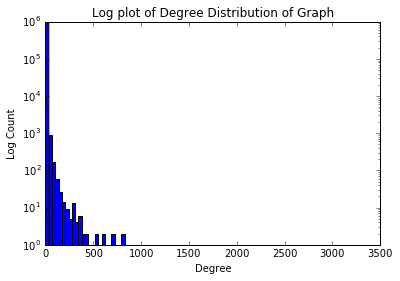

In [19]:
plt.yscale('log')
plt.ylabel('Log Count')
plt.title('Log plot of Degree Distribution of Graph')
plt.xscale('linear')
plt.xlabel('Degree')
plt.hist(DegList,bins=100)

In [20]:
DegList = list(nx.degree(G).items())
for D in DegList:
    if D[1]>3000:
        print(D)


('mileycyrus', 3450)


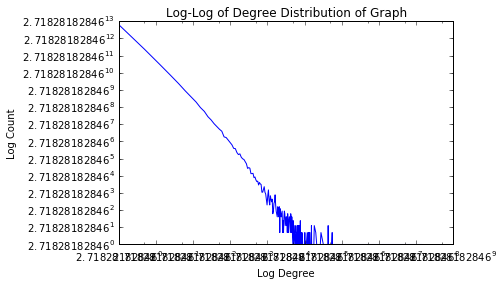

In [21]:
plt.title('Log-Log of Degree Distribution of Graph')
plt.ylabel('Log Count')
plt.xlabel('Log Degree')
DegList = sorted(DegDic.items())
Xlist, Ylist = zip(*DegList)
plt.loglog(Xlist,Ylist, basex=np.e, basey=np.e)
del Xlist
del Ylist

In [27]:
del DegDic
del DegList

In [118]:
LargestCC = max(nx.connected_component_subgraphs(G), key=len) # largest connected component
print(nx.number_of_nodes(LargestCC))

339766


In [120]:
LargestCC.remove_edges_from(LargestCC.selfloop_edges())
scaler = MinMaxScaler((50,800))

In [ ]:
CoreCounts = []
for i in range(2,10):
    core_i = nx.k_core(LargestCC, i)
    CoreCounts.append(nx.number_of_nodes(core_i))
del core_i

In [ ]:
plt.yscale('log')
plt.plot(range(2,10),CoreCounts)

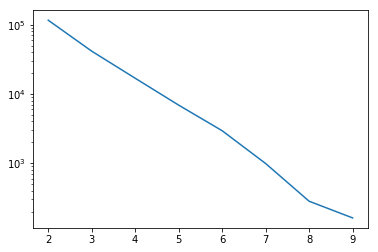

In [37]:
#WOWWWWWWWW worth including

In [121]:
core7 = nx.k_core(LargestCC,7)

In [11]:
Bcent = np.array(list(nx.betweenness_centrality(core7,normalized = True).values()))
scaledBC = scaler.fit_transform(Bcent)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [12]:
Ecent = np.array(list(nx.eigenvector_centrality_numpy(core7).values()))
scaledEC = scaler.fit_transform(Ecent[:,np.newaxis])

In [ ]:
Ccent = np.array(list(nx.closeness_centrality(core7).values()))
scaledCC = scaler.fit_transform(Ccent[:,np.newaxis])

In [17]:
L1_dist = [L1(scaledCC,scaledBC),L1(scaledEC,scaledBC),L1(scaledEC,scaledCC)]
print("""From the three measures we have explored, Eigenvalue centality
Betweenness centality and Closeness centality. We can now evaluate the
L1 distance between the measures""")
D = L1_dist[0]
print("The L1 distance between Closeness centality and Betweenness Centrality is %d implying average distance of %f"%\
      (D, D*1.0/nx.number_of_nodes(core7)))
D = L1_dist[1]
print("The L1 distance between Eigenvalue centality and Betweenness Centrality is %d implying average distance of %f"%\
      (D, D*1.0/nx.number_of_nodes(core7)))
D = L1_dist[2]
print("The L1 distance between Closeness centality and Eigenvalue Centrality is %d implying average distance of %f"%\
      (D, D*1.0/nx.number_of_nodes(core7)))

From the three measures we have explored, Eigenvalue centality
Betweenness centality and Closeness centality. We can now evaluate the
L1 distance between the measures
The L1 distance between Closeness centality and Betweenness Centrality is 386829 implying average distance of 391.527373
The L1 distance between Eigenvalue centality and Betweenness Centrality is 45735 implying average distance of 46.290495
The L1 distance between Closeness centality and Eigenvalue Centrality is 371185 implying average distance of 375.693507


(array([ 929.,   19.,   23.,    5.,    6.,    2.,    2.,    0.,    1.,    1.]),
 array([  50.,  125.,  200.,  275.,  350.,  425.,  500.,  575.,  650.,
         725.,  800.]),
 <a list of 10 Patch objects>)

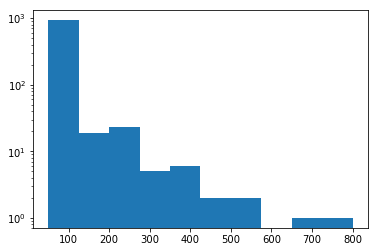

In [18]:
plt.yscale('log')
plt.hist(scaledBC)

(array([ 780.,  146.,   48.,    7.,    0.,    2.,    0.,    2.,    1.,    2.]),
 array([  50.,  125.,  200.,  275.,  350.,  425.,  500.,  575.,  650.,
         725.,  800.]),
 <a list of 10 Patch objects>)

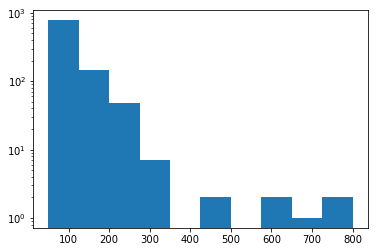

In [19]:
plt.yscale('log')
plt.hist(scaledEC)

(array([  11.,   29.,   31.,   57.,  175.,  252.,  332.,   71.,   21.,    9.]),
 array([  50.,  125.,  200.,  275.,  350.,  425.,  500.,  575.,  650.,
         725.,  800.]),
 <a list of 10 Patch objects>)

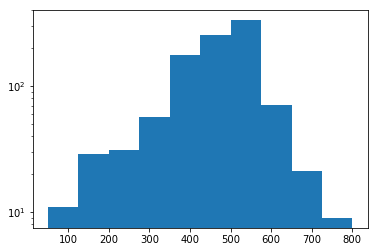

In [21]:
plt.yscale('log')
plt.hist(scaledCC)

In [63]:
f = nx.fiedler_vector(core7)
s = np.zeros(len(f),dtype='int')
s[f>0]=1

/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

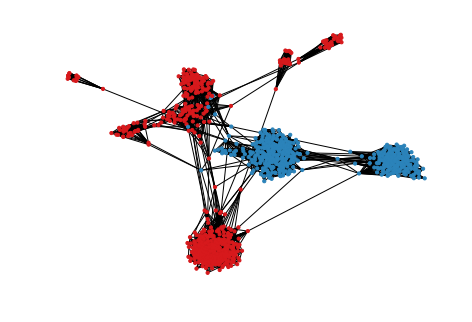

In [64]:
colors = ['#d7191c', '#2b83ba']
node_colors = [colors[s[v]] for v in range(nx.number_of_nodes(core7))]
nx.draw(core7, node_color=node_colors,node_size=10)

In [55]:
L = nx.laplacian_matrix(core7).todense()
w, v = np.linalg.eig(L)
v = np.array(v)
worder = np.argsort(w)
#pos = {i: np.array([f[0], f[1]]) for i, f in enumerate(zip(v[:,worder[1]], v[:,worder[2]]))}

In [56]:
X = v @ np.diag(w)
X = X[:,worder]

In [57]:
error = np.zeros(9)
for k in range(2,11):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
    kmeans.fit_predict(X[:,1:3])
    error[k-2] = kmeans.inertia_


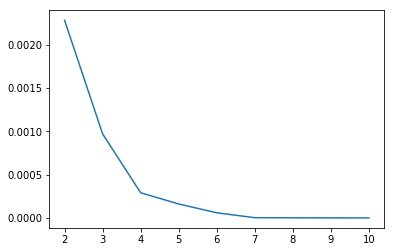

In [58]:
plt.plot(range(2,11),error)

In [68]:
kmeans = KMeans(init='k-means++', n_clusters=6, n_init=10)
kmeans.fit_predict(X[:,1:3])
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_

/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/home/ubuntu/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold i

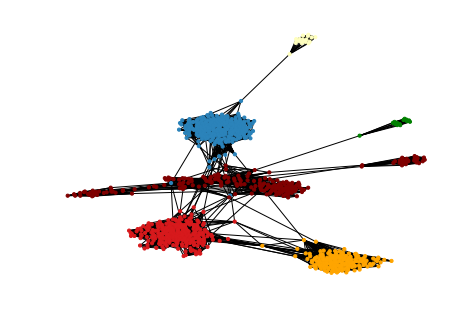

In [70]:
colors = ['#d7191c', '#ffffbf', '#2b83ba', 'green','orange','maroon']
node_colors = [colors[labels[i]] for i in range(nx.number_of_nodes(core7))]
nx.draw(core7, node_color=node_colors,node_size=10)

In [67]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=8, max_df=0.8)
dtm = vectorizer.fit_transform(TextList)

del TextList
terms = vectorizer.get_feature_names()
print("Finished")

NameError: name 'TfidfVectorizer' is not defined

In [23]:
df = pd.read_csv('training.1600000.processed.noemoticon.csv',names=cols,encoding='latin-1')#names=m_cols ,

In [25]:
prefix = './trainingandtestdata/'

testfile = prefix + 'testdata.manual.2009.06.14.csv'
trainfile = prefix + 'training.1600000.processed.noemoticon.csv'


In [27]:
df = pd.read_csv(trainfile,names=cols,encoding='latin-1')#names=m_cols ,

In [28]:
len(df)

1600000

In [29]:
df.head()

,polarity,tweetID,date,Query,UserID,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [41]:
df_small = df.iloc[:600000]

In [31]:
len(df_small)

1000

In [44]:
#long
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', min_df=8,max_df=0.8)
M = vectorizer.fit_transform(df.text)

In [48]:
print type(M)
M

<class 'scipy.sparse.csr.csr_matrix'>


<1600000x52521 sparse matrix of type '<type 'numpy.float64'>'
	with 10140434 stored elements in Compressed Sparse Row format>

In [55]:
#doesnt work well

# from scipy import io

# with open('M.mtx','w') as fout:
#     io.mmwrite(fout, M)#, comment='', field=None, precision=None, symmetry=None)[source]

# io.mmwrite('M', M)

In [53]:

from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=50, n_iter=10, random_state=42)
X = svd.fit_transform(M) 

In [139]:
svd.components_

array([[  2.72001580e-03,   1.69149426e-03,   1.09716343e-04, ...,
          2.72950482e-05,   3.23040176e-06,   5.18766711e-06],
       [ -4.29279707e-04,   1.22860704e-03,   5.74032116e-05, ...,
          3.49286375e-05,   7.78247908e-06,   1.07673030e-05],
       [ -6.20510551e-04,  -2.94362336e-04,  -4.71793942e-05, ...,
          3.79566391e-06,  -8.31496087e-08,   3.20352253e-06],
       ..., 
       [ -1.17122879e-04,  -6.05301438e-05,   1.80451782e-05, ...,
         -1.61457500e-05,   8.85458117e-07,  -1.28697769e-06],
       [ -5.88878369e-04,  -3.37554068e-04,   7.58171236e-05, ...,
          1.73194680e-06,   4.35612975e-07,  -2.37956566e-06],
       [ -8.27196817e-04,  -2.17366492e-04,  -2.30040004e-05, ...,
         -3.65960547e-05,   1.45690214e-06,  -1.99006957e-06]])

In [56]:
X.shape

(1600000, 50)

In [57]:
#Kmeans

# Clustering with some parameters.

from sklearn.cluster import KMeans
ncl = 8
k = 30
kmeans = KMeans(n_clusters=ncl, init='k-means++', max_iter=100, n_init=10,random_state=0)
y = kmeans.fit_predict(X[:,:k])
# centroids = kmeans.cluster_centers_
# labels = kmeans.labels_
# error = kmeans.inertia_
y

array([6, 7, 0, ..., 0, 7, 0], dtype=int32)

In [ ]:
for tweets in df[:1000]

In [59]:
df_ = df.copy()

In [131]:
df_['class'] = y_30

In [138]:
df_[df_['class']==4]

,polarity,tweetID,date,Query,UserID,text,class
103,0,1467837470,Mon Apr 06 22:26:43 PDT 2009,NO_QUERY,annette414,watching &quot;House&quot;,4
119,0,1467839586,Mon Apr 06 22:27:18 PDT 2009,NO_QUERY,sonyolmos,@eRRe_sC aaw i miss ya all too.. im leaving to...,4
124,0,1467840552,Mon Apr 06 22:27:34 PDT 2009,NO_QUERY,weefranniev,"Late night snack, glass of OJ b/c I'm &quot;do...",4
183,0,1467858363,Mon Apr 06 22:32:12 PDT 2009,NO_QUERY,schammy,Downloading NIN's new album &quot;the slip&quo...,4
206,0,1467862710,Mon Apr 06 22:33:20 PDT 2009,NO_QUERY,Jemimus,My mind and body are severely protesting this ...,4
213,0,1467863684,Mon Apr 06 22:33:35 PDT 2009,NO_QUERY,DjGundam,Awwh babs... you look so sad underneith that s...,4
286,0,1467881920,Mon Apr 06 22:38:28 PDT 2009,NO_QUERY,mumu1210,"FML: So much for seniority, bc of technologica...",4
319,0,1467894593,Mon Apr 06 22:41:52 PDT 2009,NO_QUERY,Tanja71,@JonathanRKnight Oh! Did I mention it? &quot;G...,4
393,0,1467911624,Mon Apr 06 22:46:32 PDT 2009,NO_QUERY,Mati_UOIT,Sitting here wondering why &quot;ED&quot; stil...,4
400,0,1467913111,Mon Apr 06 22:46:57 PDT 2009,NO_QUERY,nssmom,#3 woke up and was having an accident - &quot;...,4


In [133]:
df_[df_['class']==5]

,polarity,tweetID,date,Query,UserID,text,class
99,0,1467836859,Mon Apr 06 22:26:33 PDT 2009,NO_QUERY,willy_chaz,A bad nite for the favorite teams: Astros and ...,5
122,0,1467840016,Mon Apr 06 22:27:25 PDT 2009,NO_QUERY,BustaBusta,I know my life has been flipped upside down wh...,5
160,0,1467853356,Mon Apr 06 22:30:54 PDT 2009,NO_QUERY,dbmendel,Picked Mich St to win it all from the get go. ...,5
178,0,1467857297,Mon Apr 06 22:31:56 PDT 2009,NO_QUERY,amanda5280,Today I realized I am too good at hiding thing...,5
192,0,1467859820,Mon Apr 06 22:32:36 PDT 2009,NO_QUERY,msbutt3rfly14,spencer is not a good guy.,5
219,0,1467871040,Mon Apr 06 22:35:31 PDT 2009,NO_QUERY,MTLarson1224,@DonnieWahlberg I hope i can make it to the au...,5
222,0,1467871545,Mon Apr 06 22:35:40 PDT 2009,NO_QUERY,Cherye101,"@PaulaAbdul awww, Good luck Paula!! Please don...",5
290,0,1467882902,Mon Apr 06 22:38:44 PDT 2009,NO_QUERY,usagiko,"@LevenRambin: Take it easy, and be good to you.",5
298,0,1467889791,Mon Apr 06 22:40:33 PDT 2009,NO_QUERY,jennhelvering,Just called Hillsong again - they said they co...,5
320,0,1467894600,Mon Apr 06 22:41:51 PDT 2009,NO_QUERY,dreaaa,throat is closing up and i had some string che...,5


In [103]:
df_[df_['UserID']=='usagiko']

,polarity,tweetID,date,Query,UserID,text,class
290,0,1467882902,Mon Apr 06 22:38:44 PDT 2009,NO_QUERY,usagiko,"@LevenRambin: Take it easy, and be good to you.",5
121160,0,1833443461,Sun May 17 23:18:10 PDT 2009,NO_QUERY,usagiko,@danielthomsen: I hope you don't get the hamth...,7
122488,0,1833720820,Mon May 18 00:13:28 PDT 2009,NO_QUERY,usagiko,@rocketgirl13: I'd hug you but I'd be hugging ...,0
132187,0,1835698381,Mon May 18 06:33:52 PDT 2009,NO_QUERY,usagiko,Why am I awake?,0
188985,0,1969000232,Fri May 29 22:45:38 PDT 2009,NO_QUERY,usagiko,"@aelysian: we're too popular for our own good,...",5
231465,0,1978970242,Sun May 31 01:07:24 PDT 2009,NO_QUERY,usagiko,@churunga: I still have your gifts to send. I ...,7
258601,0,1985229042,Sun May 31 16:41:30 PDT 2009,NO_QUERY,usagiko,@roanapur: oh honey. I'm so sorry.,7
379545,0,2052364361,Sat Jun 06 00:29:06 PDT 2009,NO_QUERY,usagiko,@trifluorides: I wish I could use those. But b...,7
380562,0,2052591055,Sat Jun 06 01:16:00 PDT 2009,NO_QUERY,usagiko,"@DarthRyu666: I got the raw, since I'm hardcor...",7
411700,0,2060181181,Sat Jun 06 18:25:00 PDT 2009,NO_QUERY,usagiko,@kiptripsyc: I want the new forme of pokemans.,4


In [130]:
classes = {}
for user in df_['UserID'].unique():
    vals = {}
    for i in df_[df_['UserID']==user]['class']:
        if i!=1:
            if i in vals:
                vals[i]+=1
            else:
                vals[i]=1

    try:
        classes[user] = max(vals, key=stats.get)
    except ValueError:
        classes[user] = 1

KeyboardInterrupt: 

In [ ]:
import statistics
from statistics import StatisticsError
import random
import math


# colors = ['#d7191c', '#ffffbf', '#2b83ba', 'green','orange','maroon','black']
user_class = []
for g in core7:
    try:
        try:
            Id_Pred = df_[df_['UserID']==user]['class']
            X = statistics.mode(ID_Pred[g])
            node_colors.append(colors[X])
        except StatisticsError:
            node_colors.append(colors[ID_Pred[g][random.randint(0,len(ID_Pred[g])-1)]])
    except KeyError:
        node_colors.append(colors[6])

In [112]:
# df_[df_['UserID']=='ForzaRagazza']
vals = {}
for i in df_[df_['UserID']=='usagiko']['class']:
    if i!=1:
        if i in vals:
            vals[i]+=1
        else:
            vals[i]=1

max(vals, key=stats.get)

0

In [100]:
stats = {'a':2,'b':4,'c':1}
max(stats, key=stats.get)

'b'

In [97]:
df_

,polarity,tweetID,date,Query,UserID,text,class
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",6
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,7
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,7
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,0
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug,0
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,4
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,0
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?,0


In [95]:
dfff = pd.DataFrame({'A': [1, 2, 1, 2, 1, 2, 3],'B': [5, 6, 5, 5, 5, 7, 6]})
# df.mode()

In [73]:
# df.columns#
df[u'UserID'].unique()

array([u'_TheSpecialOne_', u'scotthamilton', u'mattycus', ...,
       u'EvolveTom', u'AmandaMarie1028', u'bpbabe'], dtype=object)

In [66]:
#Kmeans

# Clustering with some parameters.

from sklearn.cluster import KMeans
ncl = 8
k = 30
kmeans_30 = KMeans(n_clusters=ncl, init='k-means++', max_iter=100, n_init=10,random_state=0)
y_30 = kmeans_30.fit_predict(X[:,:30])
# centroids = kmeans.cluster_centers_
# labels = kmeans.labels_
# error = kmeans.inertia_
y_30

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:

# # GG=nx.Graph() # so that we dont destroy G if we start running this cell

# m=0
# n=0

# for index, row in df_.iterrows():
#     G.add_node(row[4])
#     if '@' in row[5]:
#         m+=1
#         for t in re.split('[^a-zA-Z\_\@]', row[5]):
#             if t!='' and t[0]=='@':
#                 G.add_edge(row[4],t[1:])
#                 n+=1

In [127]:
colors = ['b','w','r','g','c','m','y','k']
# g : green.
# r : red.
# c : cyan.
# m : magenta.
# y : yellow.
# k : black.
# w : white.

In [125]:
i=0
labeled_nodes = []
for x in core7.nodes():
    labeled_nodes.append( (x, 1) )
    try:
        labeled_nodes[i]=( (x,classes[x]) )
    except KeyError:
        pass
    i+=1

In [ ]:
labeled

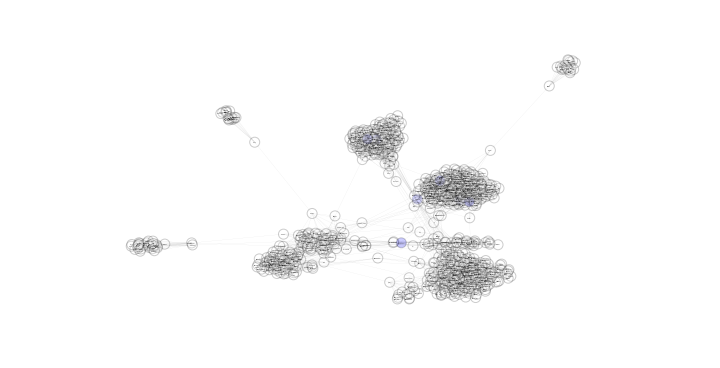

In [129]:
fig = plt.figure(figsize=(12,6))
ax = plt.subplot(111)

# labeled_nodes = [(x,classes[x]) for x in core7.nodes()]
    
# which = np.random.choice(range(len(labeled_nodes)),500)
which = range(len(core7))
# mini_g = core7.subgraph([labeled_nodes[i][0] for i in which])
mini_g = core7
node_colors = [colors[labeled_nodes[i][1]] for i in which]

nx.draw(mini_g, node_color=node_colors,node_size=100, ax=ax, with_labels='False',
       alpha =0.2, font_size=0,width=0.1)
# nx.draw(Gc_core,nodelist=Gc_core.nodes()[:100], node_color=node_colors,node_size=100, ax=ax, with_labels='False',
#        alpha =0.2, font_size=0,width=0.1)
# nx.draw(Gc_core, node_color=node_colors,node_size=10, ax=ax, with_labels='True', font_size=16)

In [74]:
type(G.nodes()[0])

str

In [79]:
G.nodes()[1]

'elmoberry'

In [107]:
list(y_30).count(0)

52429

In [108]:
list(y_30).count(1)

1247302

In [110]:
for i in xrange(ncl):
    print list(y_30).count(i)

52429
1247302
43656
32481
33136
67484
52836
70676


In [111]:
# #Kmeans

# # Clustering with some parameters.

# from sklearn.cluster import KMeans
# ncl = 20
# k = 10
# kmeans_10_100 = KMeans(n_clusters=ncl, init='k-means++', max_iter=100, n_init=10,random_state=0)
# y_10_100 = kmeans_10_100.fit_predict(X[:,:10])
# # centroids = kmeans.cluster_centers_
# # labels = kmeans.labels_
# # error = kmeans.inertia_
# y_10_100

KeyboardInterrupt: 

In [ ]:
for i in xrange(100):
    if pred[i]==1:
        print TextList[i]